# **Метод Опорних Векторів (Support Vector Machine, SVM)**

![image](https://miro.medium.com/v2/resize:fit:828/format:webp/1*d1Pycgqeeba1mJ0-faPOEQ.png)

![image](https://miro.medium.com/v2/resize:fit:750/1*fYXRn8T4u-BTGxFelpC2yg.gif)

![image](https://miro.medium.com/v2/resize:fit:750/1*P0_fZcJ0okbwW2Pc-nk59g.gif)

![image](https://miro.medium.com/v2/resize:fit:828/format:webp/1*z5sMm7_3zNl7KJC3SBdOmA.png)

![image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*v0OUUim9Ur14Qsb904cMDQ.png)



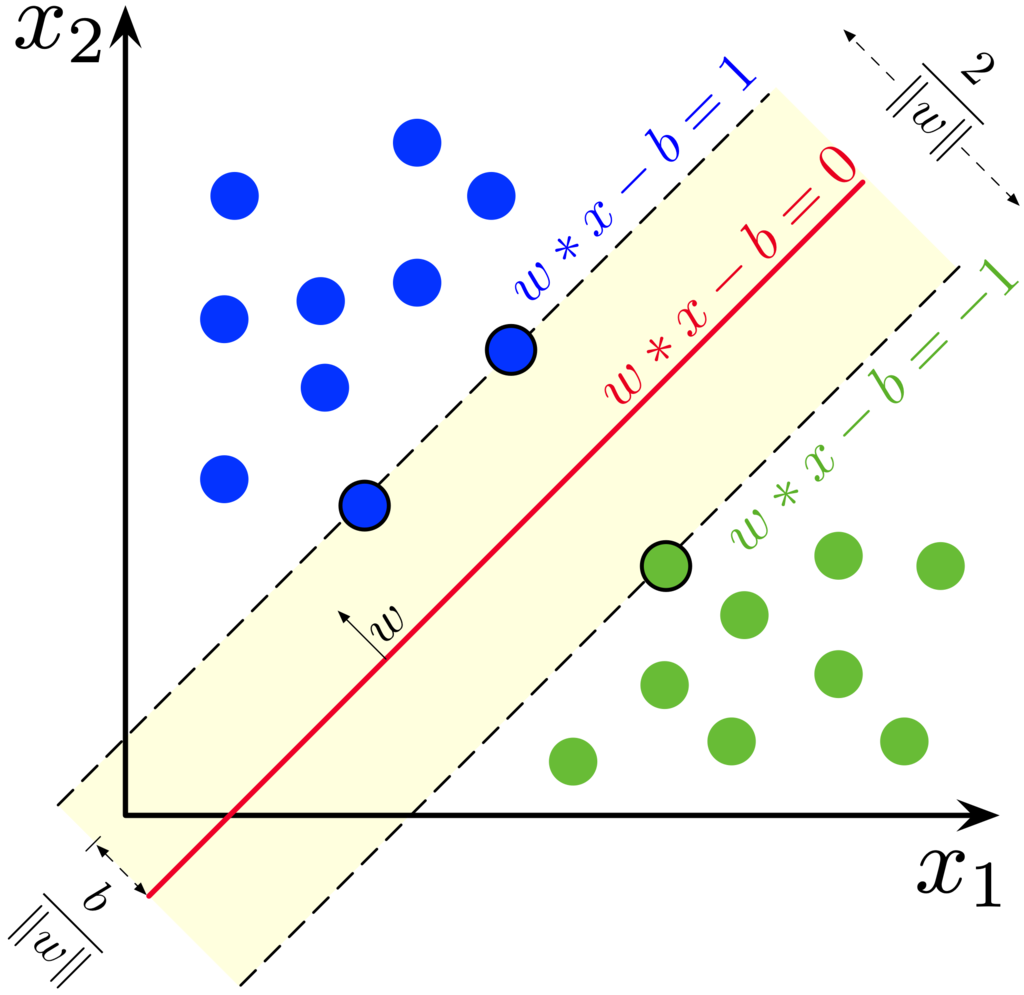

# **Вступ до Методу Опорних Векторів (SVM)**

Метод Опорних Векторів (SVM) є потужним і універсальним моделлю машинного навчання, який може здійснювати лінійну або нелінійну класифікацію, регресію і навіть виявлення викидів. SVM особливо підходить для класифікації складних невеликих або середніх наборів даних.

SVM працює, створюючи найширшу можливу "вулицю" між класами, яка визначається двома паралельними гіперплощинами. Метою є вибір гіперплощин таким чином, щоб ширина маржі між ними була максимальною, одночасно обмежуючи порушення маржі (екземпляри, які потрапляють у середину "вулиці" або на неправильний бік).

# Розуміння Методу Опорних Векторів (SVM): Теоретичне пояснення та Формули

Метод Опорних Векторів (SVM) є дискримінативним класифікатором, формально визначеним за допомогою роздільної гіперплощини. Іншими словами, заданими навчальними даними з мітками (навчання з учителем), алгоритм виводить оптимальну гіперплощину, яка категоризує нові приклади.

SVM максимізує маржу навколо роздільної гіперплощини. Функція прийняття рішення повністю визначається (зазвичай дуже малим) підмножиною навчальних прикладів, векторів опору. Вони лежать на межі маржі.

Розглянемо навчальний набір даних з парами екземпляр-мітка $(x_i, y_i)$, $i=1,...,N$, де $x_i ∈ R^p$, а $y$ дорівнює або 1, або -1, що вказує на клас, до якого належить точка $x_i$. Кожен $x_i$ є $p$-вимірним вектором дійсних чисел.

Метою SVM є знаходження оптимальної роздільної гіперплощини, яка максимізує маржу навчальних даних. Функція прийняття рішення має вигляд:

$$f(x) = sign(<w \cdot x> + b)$$

Якщо навчальні дані лінійно роздільні, ми можемо вибрати дві гіперплощини таким чином, щоб вони розділяли дані і між ними не було точок, і потім намагатися максимізувати відстань між ними. Область, обмежена цими двома гіперплощинами, називається "маржою", а гіперплощина з максимальною маржею - це гіперплощина, що лежить на середині між ними. З нормалізованим або стандартизованим набором даних ці гіперплощини можуть бути описані рівняннями:

$$w \cdot x - b = 1$$

та

$$w \cdot x - b = -1$$

Геометрично відстань між цими двома гіперплощинами дорівнює $2 / ||w||$, тому для максимізації відстані нам потрібно мінімізувати $||w||$. Проблема підлягає обмеженню для кожного $i$:

$$y_i(<w \cdot x_i> + b) >= 1$$

Це квадратична оптимізаційна задача, яку можна вирішити за допомогою множників Лагранжа для отримання вектора ваг $w$ та зміщення $b$. У практиці зазвичай використовується бібліотека або вбудована функція для розв'язання цієї задачі, але корисно розуміти основний процес.

Таке розділення класів гіперплощиною називається жорстким, оскільки така модель не дозволяє робити помилок, і різні класи чітко лежать по різні сторони розділяючої гіперплощини. Геометрично ширина розділяючої полоси (margin) рівна $2 \, \left\| \mathbf{w} \right\|$, де $\left\| \mathbf{w} \right\|$ норма вектору вагів, що рівна кореню зі скалярного добутку вектора вагів самого на себе, тобто:

$$\left\| \mathbf{w} \right\| = \mathbf{w} \cdot \mathbf{w} = \sum_{i=1}^n w_i^2$$

І оскільки ми хочемо максимізувати ширину розподіляючої полоси, і такий тип класифікаторів називають maximum margin, то величина норми, чи довжини, вектора вагів повинна бути мінімальною. А значить ми можемо використати алгоритм градієнтного спуску і знайти оптимальні значення коефіцієнтів $w_i$. І, до речі, останнє визначення довжини вектору може нам дещо нагадати - а саме доданок $\lambda \left\| \mathbf{w} \right\|^2$ регуляризації.


col_0,0,1
row_0,,
0,50,0
1,0,50


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Score: 1.0


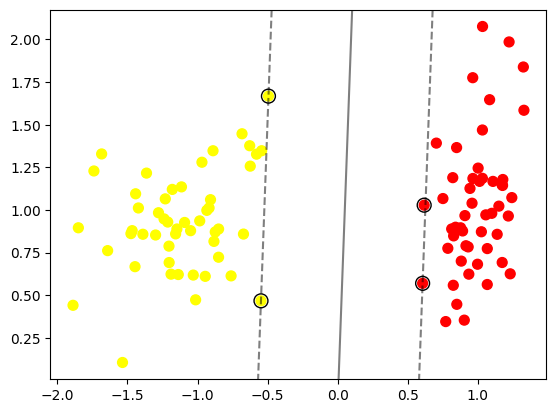

In [49]:
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# make a synthetic dataset
# X, y = make_circles(100, factor=.1, noise=.1)
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=1
)

# Apply it
clf = SVC(kernel='linear', degree=3)
clf.fit(X, y)

# Get scores
predictions = clf.predict(X)
score = accuracy_score(y, predictions)
display(pd.crosstab(y, predictions))
print(classification_report(y, predictions))
print("Score:", score)

# Get w, b
# print("Weights:", clf.coef_)
# print("Intercept:", clf.intercept_)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.show()

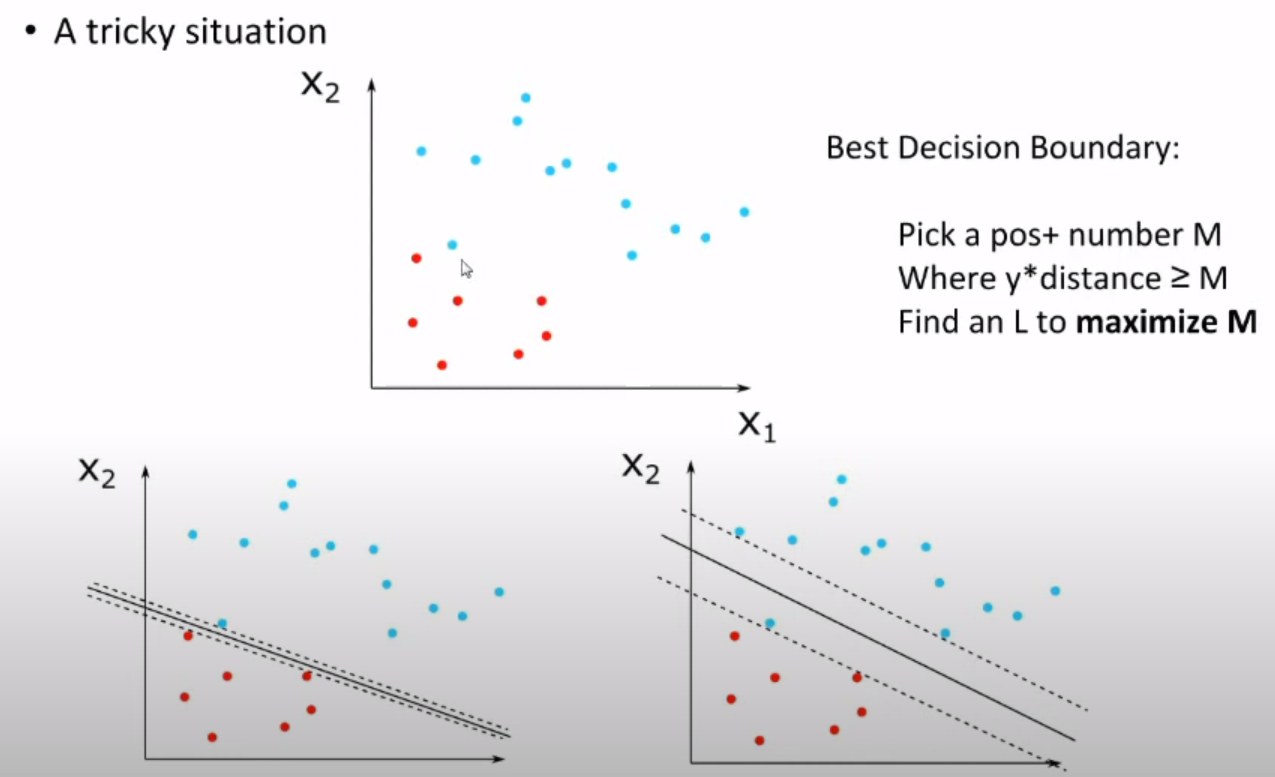


$$
\begin{cases}
cost_1 = max(0, 1 - (\mathbf{w} \cdot \mathbf{x}_i + b)) & \text{if } y_i = 1, \\
cost_0 = max(0, 1 + (\mathbf{w} \cdot \mathbf{x}_i + b)) & \text{if } y_i = 0.
\end{cases}
$$



$$
\text{Loss} = C \sum_{i=1}^{m} \left[ y^{(i)} \max(0, 1 - (\mathbf{w} \cdot \mathbf{x}^{(i)} + b)) + (1 - y^{(i)}) \max(0, 1 + (\mathbf{w} \cdot \mathbf{x}^{(i)} + b)) \right] + \frac{1}{2} \sum_{j=1}^{n} w_j^2
$$



Термін $\max(0, 1 - (\mathbf{w} \cdot \mathbf{x}^{(i)} + b))$ відомий як hinge loss. Він використовується у SVM з м'яким краєм для вимірювання "втрати" або помилки для кожної точки даних. Втрата на шарнірі працює так:

- Якщо точка даних правильно класифікована і знаходиться за межами краю, то $\mathbf{w} \cdot \mathbf{x}^{(i)} + b$ матиме той же знак, що і $y^{(i)}$, і його абсолютне значення буде більше або дорівнює 1. У цьому випадку $1 - y^{(i)} (\mathbf{w} \cdot \mathbf{x}^{(i)} + b)$ буде менше або дорівнює 0, і hinge loss $\max(0, 1 - y^{(i)} (\mathbf{w} \cdot \mathbf{x}^{(i)} + b))$ буде 0. Це означає, що немає штрафу за точки, які правильно класифіковані і знаходяться за межами краю.

- Якщо точка даних правильно класифікована, але знаходиться всередині краю, то $\mathbf{w} \cdot \mathbf{x}^{(i)} + b$ матиме той же знак, що і $y^{(i)}$, але його абсолютне значення буде менше 1. У цьому випадку $1 - y^{(i)} (\mathbf{w} \cdot \mathbf{x}^{(i)} + b)$ буде більше 0, і hinge loss буде додатною. Це означає, що є штраф за точки, які правильно класифіковані, але знаходяться всередині краю.

- Якщо точка даних класифікована неправильно, то $\mathbf{w} \cdot \mathbf{x}^{(i)} + b$ матиме протилежний знак до $y^{(i)}$. У цьому випадку $1 - y^{(i)} (\mathbf{w} \cdot \mathbf{x}^{(i)} + b)$ буде більше 1, і hinge loss буде додатною. Це означає, що є штраф за точки, які класифіковані неправильно.

Взагалі кажучи, hinge loss штрафує точки, які знаходяться всередині краю або класифіковані неправильно. Метою SVM є знаходження гіперплощини (визначеної $\mathbf{w}$ та $b$), яка мінімізує загальну hinge loss по всіх точках даних, за умови,

 що $\|\mathbf{w}\|$ маленький (що забезпечує великий край).

# Математична основа SVM

Ключ до розуміння SVM полягає в розумінні концепцій границь рішень, марж, опорних векторів та ядер.

- **Границі рішень:** Це лінії (у 2D) або гіперплощини (у вищих розмірностях), які розділяють різні класи в просторі ознак.

- **Маржі:** Маржа - це відстань між границею рішення та найближчими точками даних з будь-якого класу. Мета SVM - максимізувати цю маржу.

- **Опорні вектори:** Це точки даних, які найближчі до границі рішення. Положення границі рішення повністю визначається опорними векторами.

- **Ядра:** Коли дані не є лінійно роздільними в оригінальному просторі ознак, SVM використовують метод, названий "трюком з ядром", для проектування даних у простір вищої розмірності, де вони є лінійно роздільними. Різні типи ядер можуть використовуватися в залежності від характеру даних.


1. **Лінійна функція ядра**: Це найпростіший тип ядра, який вимірює внутрішній добуток двох вхідних векторів. Вона використовується, коли дані лінійно роздільні. Функція визначається як: $K(\mathbf{x}, \mathbf{y}) = \mathbf{x} \cdot \mathbf{y}$.

   ![Лінійне ядро](https://www6b3.wolframalpha.com/Calculate/MSP/MSP524923h3b785h79abhe200004e4ac6070i0bf3c6?MSPStoreType=image/png&s=14)

2. **Поліноміальна функція ядра**: Це ядро дозволяє більш складні перетворення шляхом введення додаткового ступеня свободи з показником $d$. Вона визначається як: $K(\mathbf{x}, \mathbf{y}) = (\mathbf{x} \cdot \mathbf{y} + r)^d$, де $r$ - це константа зміщення, а $d$ - ступінь полінома.

   ![Поліноміальне ядро](https://www6b3.wolframalpha.com/Calculate/MSP/MSP7061399b798d7b04a16000050h26haadgf0e975?MSPStoreType=image/png&s=8)

3. **Ядро радіальної базової функції (RBF)**: Це популярна функція ядра для не лінійних даних. Вона використовує гауссівську радіальну базову функцію для обчислення схожості двох точок. Вона визначається як: $K(\mathbf{x}, \mathbf{y}) = \exp(-\gamma \|\mathbf{x} - \mathbf{y}\|^2)$, де $\gamma$ - це параметр, який контролює ширину гауссівської функції.

   ![Ядро RBF](https://www6b3.wolframalpha.com/Calculate/MSP/MSP4071399b870cc9bf2f500000ch8f5a709gf86f5?MSPStoreType=image/png&s=8)

4. **Сигмоїдальна функція ядра**: Це ядро використовує гіперболічну тангенсіальну функцію для перетворення даних. Вона визначається як: $K(\mathbf{x}, \mathbf{y}) = \tanh(\alpha \mathbf{x} \cdot \mathbf{y} + r)$, де $\alpha$ - це параметр, який контролює швидкість зростання, а $r$ - це константа зміщення.

   ![Сигмоїдальне ядро](https://www6b3.wolframalpha.com/Calculate/MSP/MSP2401h2cf38c9e7b2d3i000013eb8a39715cb345?MSPStoreType=image/png&s=6)

Ці функції ядра використовуються в SVM для перетворення вхідних даних у простір вищої розмірності, де вони можуть бути легше розділені гіперплощиною. Вибір функції ядра залежить від характеру даних та конкретної проблеми.

1.0


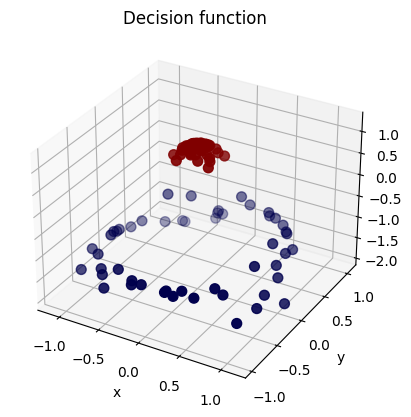

In [46]:
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

# make a synthetic dataset
X, y = make_circles(100, factor=.1, noise=.1)

# fit the model
clf = SVC(kernel='rbf', gamma=1, probability=True)
clf.fit(X, y)
print(clf.score(X, y))

# visualize the decision function in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], clf.decision_function(X), c=y, s=50, cmap='seismic')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
ax.set_title('Decision function')
plt.show()


# Налаштування та оптимізація SVM

Оптимізація параметрів SVM може привести до кращої продуктивності. Ключові параметри для SVM включають наступне:

- `C`: Це параметр регуляризації, також відомий як параметр вартості. Менше значення створює ширший коридор, що може допустити більше порушень коридору. Більше значення створює вужчий коридор, що може призвести до меншої кількості порушень коридору, але також до більшого ризику перенавчання.

- `kernel`: Це визначає тип використовуваного ядра. Це може бути 'linear', 'poly', 'rbf' та ін. Вибір ядра залежить від характеру даних.

- `degree`: Це ступінь поліноміальної функції ядра ('poly') і ігнорується всіма іншими ядрами.

- `gamma`: Це визначає, наскільки великий вплив має один приклад навчання. Чим більше gamma, тим ближче інші приклади повинні бути, щоб вони вплинули.

Ми можемо використовувати техніки, такі як пошук по сітці та перехресна перевірка, для знаходження оптимальних значень цих параметрів.


# Переваги та недоліки SVM

**Переваги:**
- Ефективний у високовимірних просторах.
- Залишається ефективним у випадках, коли кількість вимірів більша, ніж кількість зразків.
- Використовує підмножину тренувальних точок у функції прийняття рішення (називаються векторами підтримки), тому також ефективно використовує пам'ять.
- Універсальний: різні функції ядра можна вказати для функції прийняття рішення.

**Недоліки:**
- Якщо кількість ознак значно більша, ніж кількість зразків, уникнення перенавчання при виборі функцій ядра та регуляризаційного терміну є вирішальним.